In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os


In [176]:
# matplotlib.rcParams.update({'font.size': 25})

In [285]:

file_name = r"/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/log_nes_run_1709399989.351386.log"

losses = {
    "mean" : [],
    "mmd" : [],
    "avg" : [],
    "min" : [],
    "max" : [],
    "avg_accepted": [],
    "max_accepted": [],
    "min_accepted": [],
}

with open(file_name, "r") as f:
    for line in f:
        words = line.split(" ")
        if words[0] == "Mean":
            losses["mean"].append(float(words[-1]))
        if words[0] == "MMD":
            losses["mmd"].append(float(words[-1]))
        if words[0] == "Avg":
            losses["avg"].append(float(words[-1]))
        if words[0] == "Min":
            losses["min"].append(float(words[-1]))
        if words[0] == "Max":
            losses["max"].append(float(words[-1]))
        if words[0] == "Avg_accepted":
            losses["avg_accepted"].append(float(words[-1]))
        if words[0] == "Min_accepted":
            losses["min_accepted"].append(float(words[-1]))
        if words[0] == "Max_accepted":
            losses["max_accepted"].append(float(words[-1]))

df = pd.DataFrame(data=losses)
df.to_csv(f"../data/losses.csv", index=False)

In [286]:
loss_df = pd.read_csv(r"../data/losses.csv")
loss_df["diff"] = loss_df["max"] - loss_df["min"]

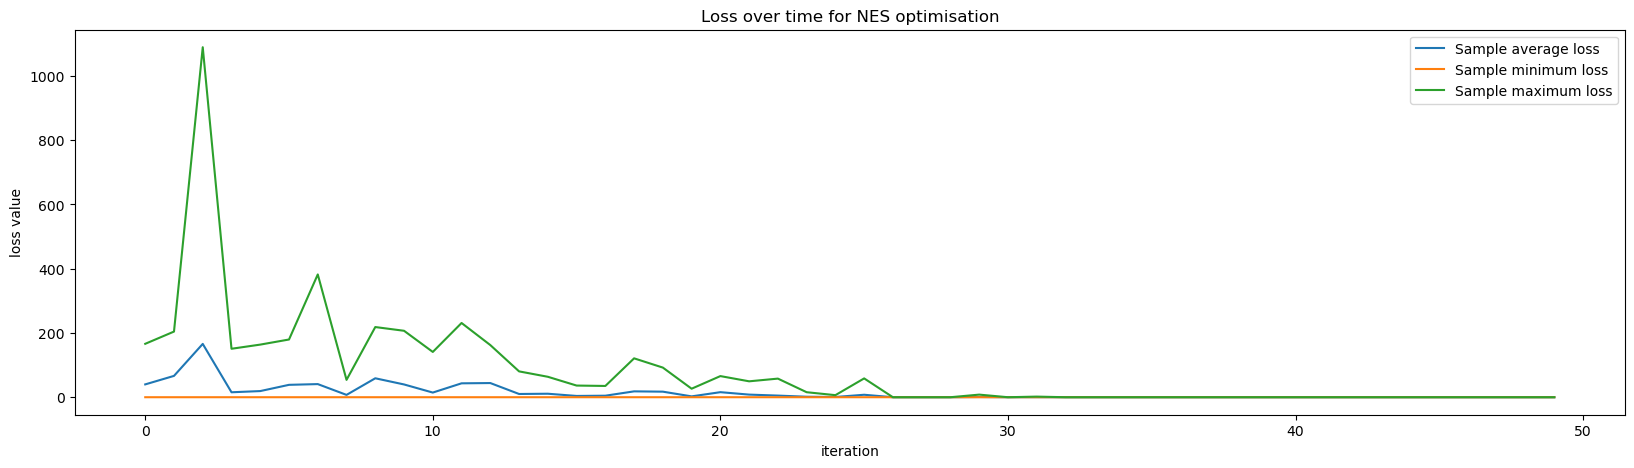

In [287]:
plt.figure(figsize=(20,5))
# plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg"], label="Sample average loss")
plt.plot(loss_df["min"], label="Sample minimum loss")
plt.plot(loss_df["max"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

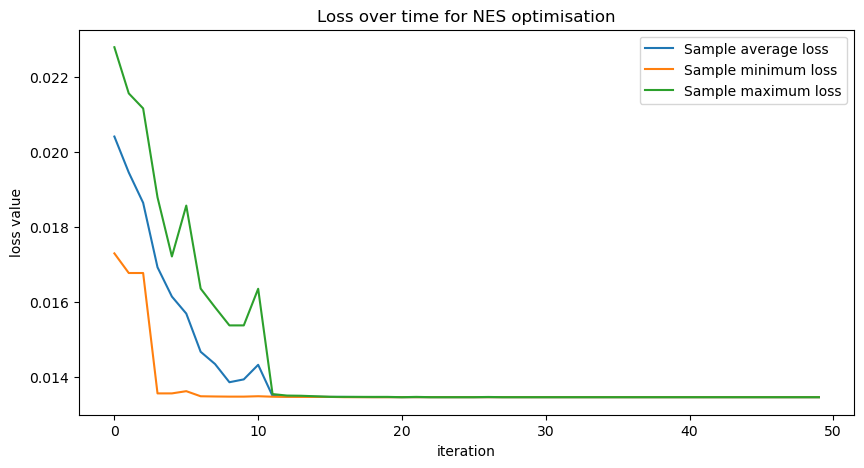

In [288]:
plt.figure(figsize=(10,5))
# plt.plot(loss_df["mean"], label="xNES mean loss")
plt.plot(loss_df["avg_accepted"], label="Sample average loss")
plt.plot(loss_df["min_accepted"], label="Sample minimum loss")
plt.plot(loss_df["max_accepted"], label="Sample maximum loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

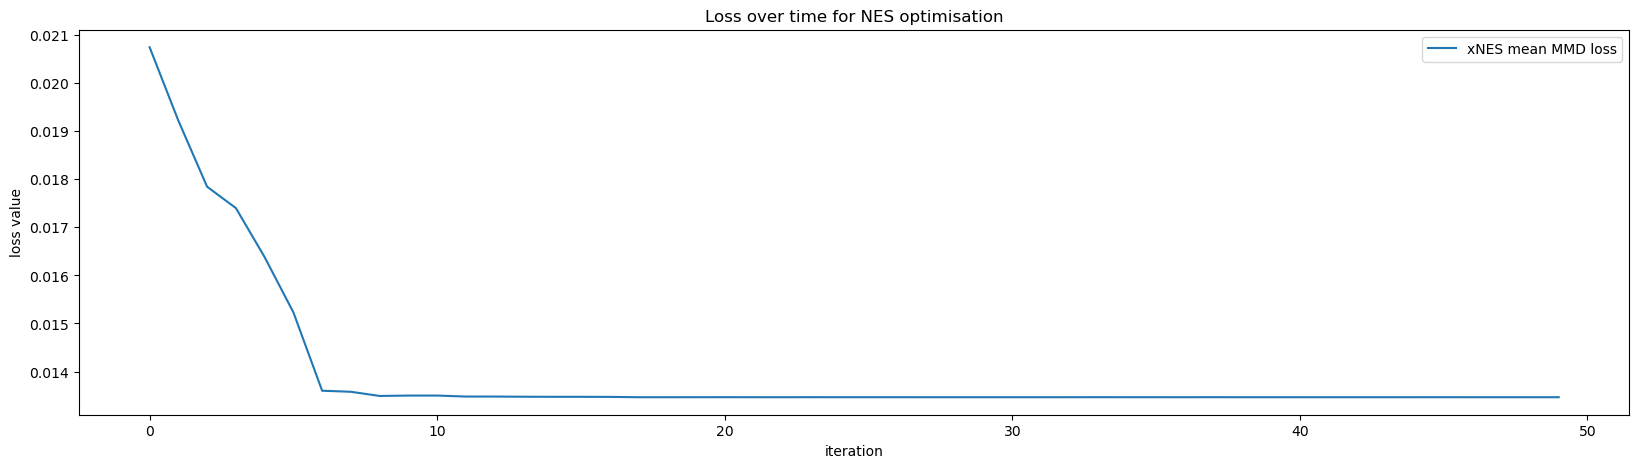

In [289]:
plt.figure(figsize=(20,5))
plt.plot(loss_df["mmd"], label="xNES mean MMD loss")
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss value")
plt.title("Loss over time for NES optimisation")
plt.show()

In [290]:
def plot_standing_average(array, show=True, label=""):
    standing_average = []
    current = 0
    for i, loss in enumerate(array):
        current += loss
        standing_average.append(current / (i + 1))
    print(standing_average[-1], standing_average[-2])
    plt.plot(standing_average, label=label)

    if show:
        plt.show()

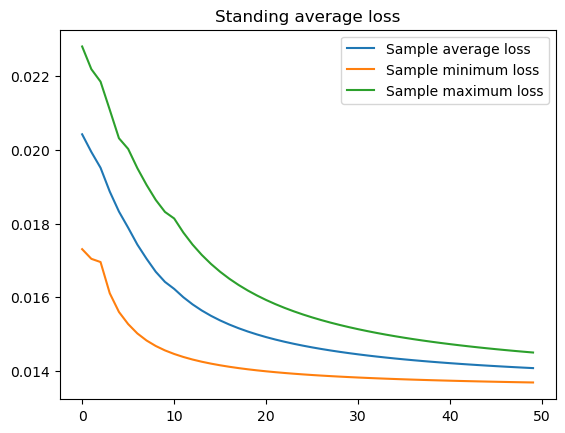

In [291]:
# plot_standing_average(loss_df["mean"].to_numpy().squeeze(), show=False, label="Distribution mean loss")
plot_standing_average(loss_df["avg_accepted"].to_numpy().squeeze(), show=False, label="Sample average loss")
plot_standing_average(loss_df["min_accepted"].to_numpy().squeeze(), show=False, label="Sample minimum loss")
plot_standing_average(loss_df["max_accepted"].to_numpy().squeeze(), show=False, label="Sample maximum loss")
plt.title("Standing average loss")
plt.legend()
plt.show()

# plot_standing_average(loss_df["mmd"].to_numpy().squeeze())

In [265]:
def print_loss_analysis(array: np.ndarray):
    print("mean:", array.mean())
    print("std:", array.std())
    print("max:", array.max())
    print("min:", array.min())
    print("range:", array.max() - array.min())

    plt.hist(array)
    plt.show()

mean: 0.10257925351874692
std: 0.0018796117951130542
max: 0.1060060188174247
min: 0.0996265932917594
range: 0.006379425525665311


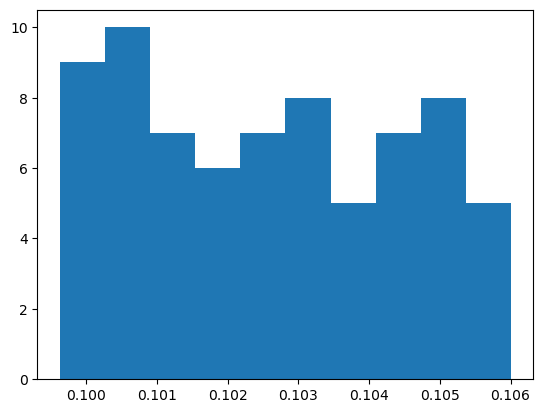

mean: 0.10257491427991122
std: 0.0018767593945654241
max: 0.1060344278812408
min: 0.0997053906321525
range: 0.006329037249088301


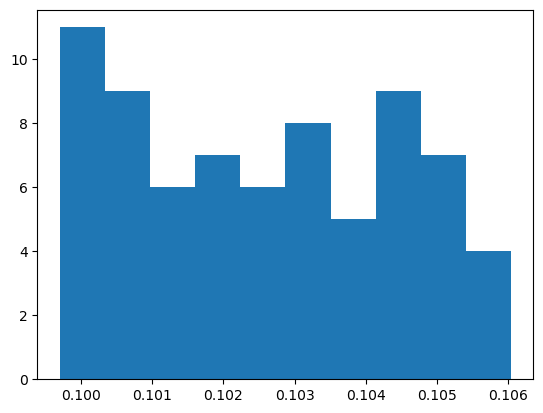

mean: 0.10237607380582221
std: 0.0018488228957147471
max: 0.1056841239333152
min: 0.0995911955833435
range: 0.006092928349971688


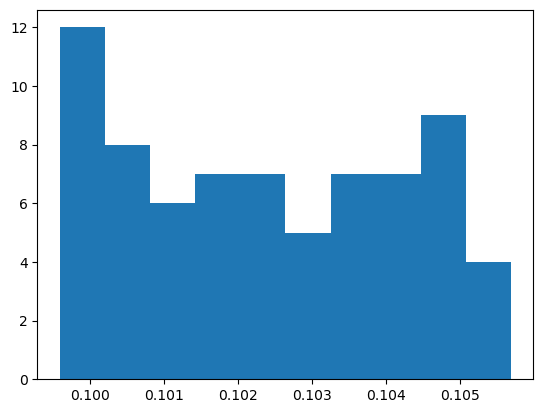

mean: 0.10278907252682574
std: 0.0019286817233795227
max: 0.1063630729913711
min: 0.0998166427016258
range: 0.006546430289745303


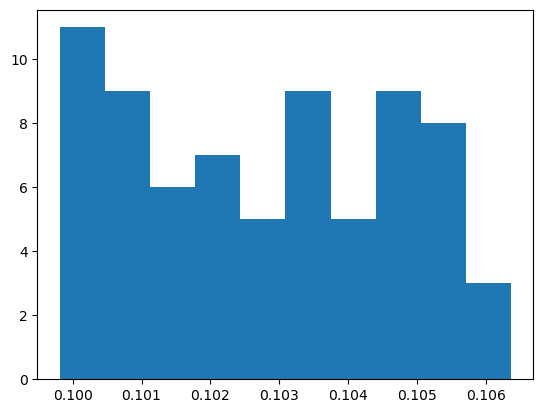

mean: 0.10257925351874692
std: 0.0018796117951130542
max: 0.1060060188174247
min: 0.0996265932917594
range: 0.006379425525665311


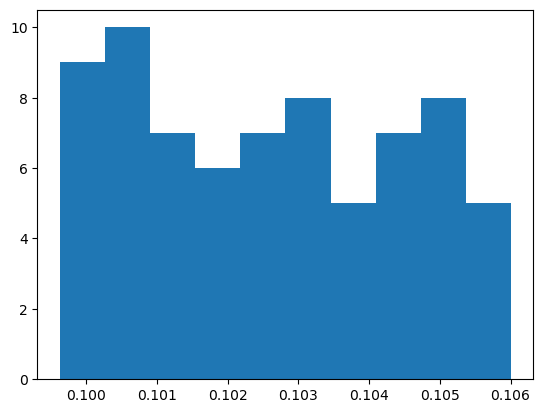

In [266]:
print_loss_analysis(loss_df["mean"].to_numpy().squeeze())
print_loss_analysis(loss_df["avg_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["min_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["max_accepted"].to_numpy().squeeze())
print_loss_analysis(loss_df["mmd"].to_numpy().squeeze())

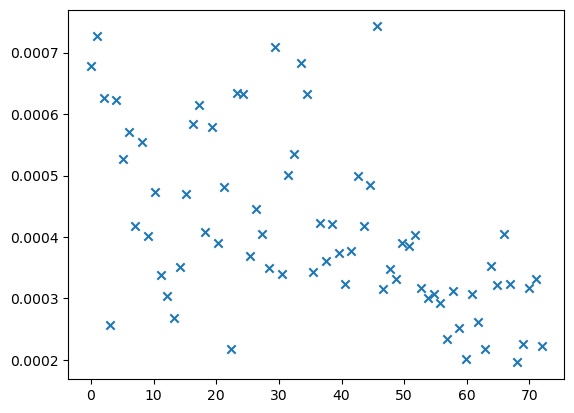

mean: 0.0004129987210035301
std: 0.00014048792829394653
max: 0.0007426291704177024
min: 0.00019568204879759354
range: 0.0005469471216201088


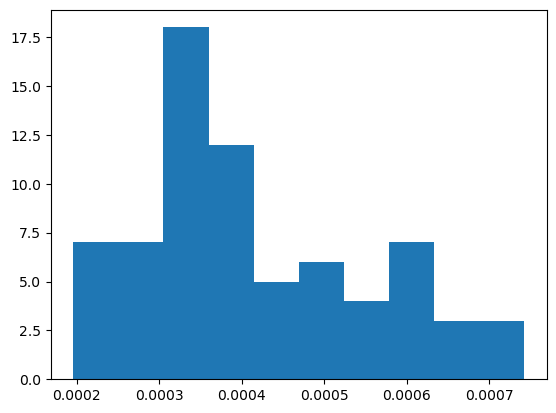

In [267]:
x_vals = np.linspace(0, len(loss_df["diff"]), len(loss_df["diff"]))
plt.scatter(x_vals, loss_df["diff"], marker="x")
plt.show()

print_loss_analysis(loss_df["diff"].to_numpy().squeeze())